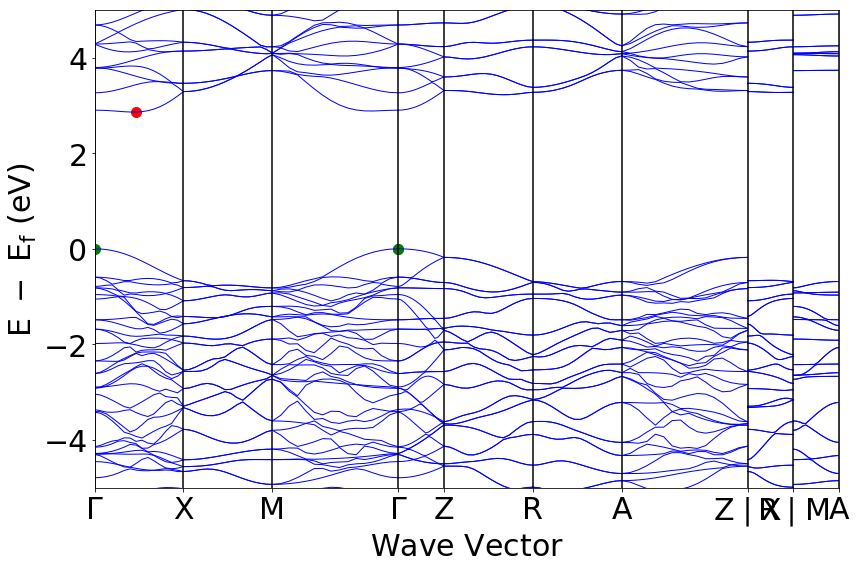

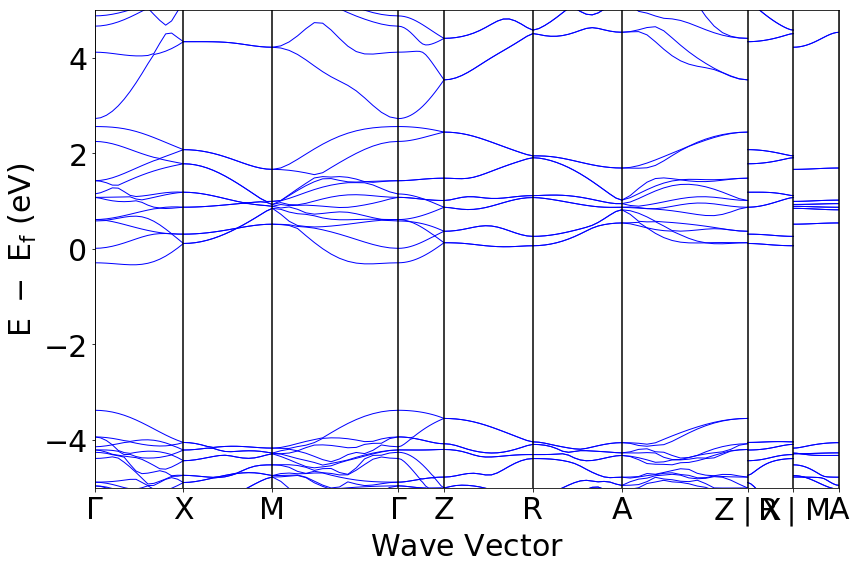

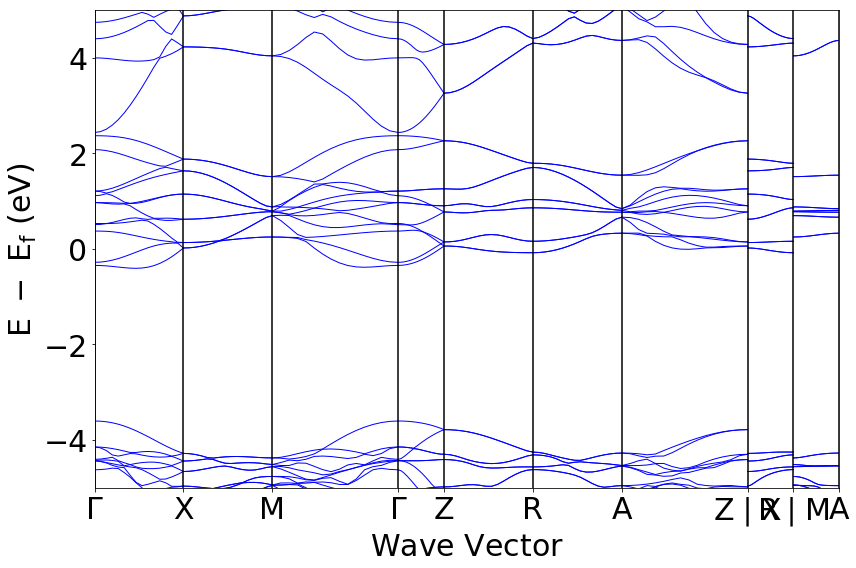

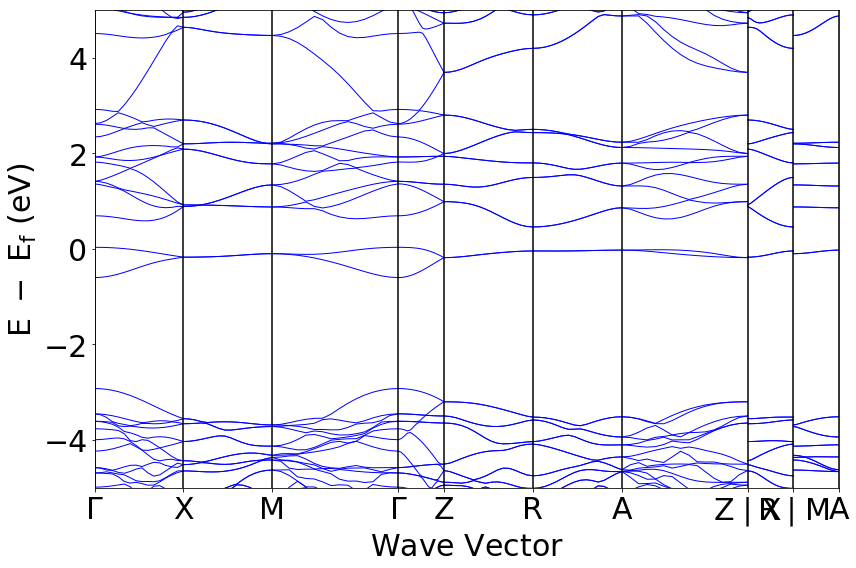

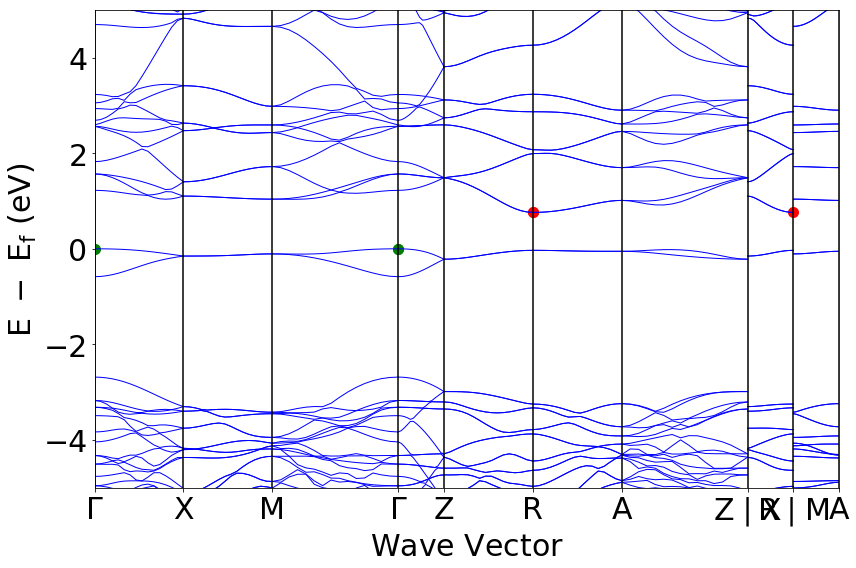

In [14]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter

for suffix in ['d0','d025','d05','d075', 'd1']:
    v = BSVasprun(f"vasprun-{suffix}.xml")
    bs = v.get_band_structure(kpoints_filename="KPOINTS.bands",line_mode=True)
    plt = BSPlotter(bs)
    plt.get_plot(vbm_cbm_marker=True,ylim=(-5,5))
    #plt.bs_plot_data(zero_to_efermi=True)
    #plt.show()
    plt.save_plot(f"figures/band-plot-{suffix}.pdf",img_format='pdf',ylim=(-5,5))